# Shooting Method

In [7]:
import numpy as np
import matplotlib.pyplot as pt

In [8]:
def rk4_step(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t+h/2, y + h/2*k1)
    k3 = f(t+h/2, y + h/2*k2)
    k4 = f(t+h, y + h*k3)
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)

Want to solve:

$$w''(t)=\frac 32w^2$$

with $w(0)=4$ and $w(1)=1$. (Example due to Stoer and Bulirsch)

In [9]:
def f(t, y):
    w, w_prime = y
    return np.array([w_prime, 3/2*w**2])

The following function carries out the shooting method for a given $w'(0)$ using RK4:

In [20]:
def shoot(w_prime):
    times = [0]
    y_values = [np.array([4, w_prime])]
    
    h = 1/2**7
    t_end = 1
    
    while times[-1] < t_end:
        y_values.append(rk4_step(y_values[-1], times[-1], h, f))
        times.append(times[-1]+h)
    
    y_values = np.array(y_values)
    
    # actually floating-point-equal due to power-of-2 h
    assert times[-1] == t_end
    
    print("w'(0) = %g  ->  w(1)= %.5g" % (w_prime, y_values[-1,0]))

    pt.plot(times, y_values[:, 0], label="$w'(0)=%.2g$" % w_prime)

Call `shoot` to see if you can solve the boundary value problem.

Start with $w'(0)=0$.

(You may call `pt.legend` to take advantage of automatic labeling.)

w'(0) = 0  ->  w(1)= 87.08
w'(0) = -5  ->  w(1)= 12.058
w'(0) = -7  ->  w(1)= 3.6442


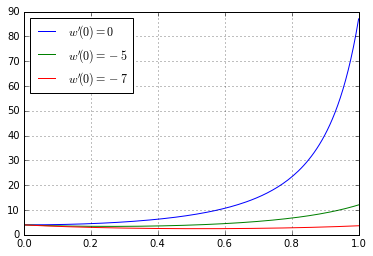

In [19]:
#clear

shoot(0)
shoot(-5)
shoot(-7)

pt.grid()
pt.legend(loc="best")

See if you can find another solution to the boundary value problem by starting with $w'(0)=-30$.

(You may call `pt.legend` to take advantage of automatic labeling.)

w'(0) = -30  ->  w(1)= -1.4668
w'(0) = -33  ->  w(1)= -0.22938
w'(0) = -36  ->  w(1)= 1.062


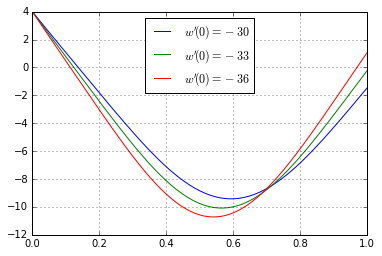

In [18]:
#clear

shoot(-30)
shoot(-33)
shoot(-36)

pt.grid()
pt.legend(loc="best")